# Extract TEXT from URL

#### Work developed by Manuel Robalinho at 10/2018

Count the words from a Web Page and present us the words with big influence (the words that occurs more times)

References:
https://docs.python.org/3.1/howto/urllib2.html

In [65]:
# Libraries
import urllib
from bs4 import BeautifulSoup
#-- Plot
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#--- URL Request
import urllib.request
# -- Print
from pprint import pprint
# -- Plot Wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import cm

In [9]:
# Inform the URL
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"

In [10]:
# make the request from the URL

req = urllib.request.Request(url)
response = urllib.request.urlopen(req)
the_page = response.read()

In [11]:
soup = BeautifulSoup(the_page, "lxml")

In [12]:
# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

print(text)

BBC NEWS | Health | Blondes 'to die out in 200 years'
NEWS
SPORT
WEATHER
WORLD SERVICE
A-Z INDEX
SEARCH
You are in: Health
News Front Page
Africa
Americas
Asia-Pacific
Europe
Middle East
South Asia
UK
Business
Entertainment
Science/Nature
Technology
Health
Medical notes
-------------
Talking Point
-------------
Country Profiles
In Depth
-------------
Programmes
-------------
SERVICES
Daily E-mail
News Ticker
Mobile/PDAs
-------------
Text Only
Feedback
Help
EDITIONS
Change to UK
Friday, 27 September, 2002, 11:51 GMT 12:51 UK
Blondes 'to die out in 200 years'
Scientists believe the last blondes will be in Finland
The last natural blondes will die out within 200 years, scientists believe.
A study by experts in Germany suggests people with blonde hair are an endangered species and will become extinct by 2202.
Researchers predict the last truly natural blonde will be born in Finland - the country with the highest proportion of blondes.
The frequency of blondes may drop but they won't disap

In [16]:
# print my text file to analyze

pprint(text, width=100)

("BBC NEWS | Health | Blondes 'to die out in 200 years'\n"
 'NEWS\n'
 'SPORT\n'
 'WEATHER\n'
 'WORLD SERVICE\n'
 'A-Z INDEX\n'
 'SEARCH\n'
 'You are in:\xa0Health\n'
 'News Front Page\n'
 'Africa\n'
 'Americas\n'
 'Asia-Pacific\n'
 'Europe\n'
 'Middle East\n'
 'South Asia\n'
 'UK\n'
 'Business\n'
 'Entertainment\n'
 'Science/Nature\n'
 'Technology\n'
 'Health\n'
 'Medical notes\n'
 '-------------\n'
 'Talking Point\n'
 '-------------\n'
 'Country Profiles\n'
 'In Depth\n'
 '-------------\n'
 'Programmes\n'
 '-------------\n'
 'SERVICES\n'
 'Daily E-mail\n'
 'News Ticker\n'
 'Mobile/PDAs\n'
 '-------------\n'
 'Text Only\n'
 'Feedback\n'
 'Help\n'
 'EDITIONS\n'
 'Change to UK\n'
 'Friday, 27 September, 2002, 11:51 GMT 12:51 UK\n'
 "Blondes 'to die out in 200 years'\n"
 'Scientists believe the last blondes will be in Finland\n'
 'The last natural blondes will die out within 200 years, scientists believe.\n'
 'A study by experts in Germany suggests people with blonde hair are an endangere

In [21]:
# Path to acess the file
path = 'ml/count_words/'

In [53]:
# Stopwords - File with words we don't need count
# read one word each line of stopwords 
stopwords = set(line.strip() for line in open(path + 'stopwords_en.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

In [54]:
# Print the words i dont't want to count ( stopword )
print (stopwords) 

{'', 'a', 'new', 'one', 'as', 'see', 'true', 'them', '7', 'to', 'their', 'a-z', 'are', 'was', "won't", 'the', 'off', 'be', 'show', 'ann', '9', 'is', 'mar', 'of', 'what', '02', 'an', 'there', '4', 'am', 'next', '09', '1', 'that', 'mrs', '6', 'more', '01', '04', 'by', '10', 'he', 'other', 'notes', 'than', '3', 'you', 'two', 'page', 'on', 'i', 'with', 'your', '06', "don't", '^^', 'can', 'they', '08', 'text', 'gmt', 'for', '8', 'last', '5', 'only', 'who', 'top', 'thing', 'say', 'not', 'it', 'over', 'said', 'news', '03', 'may', 'out', 'back', '07', '05', 'help', '2', 'but', 'will', 'while', 'how', 'in', 'within', 'these', 'mr', 'too', 'or', 'all', 'if', '0', 'do', 'index', 'and', 'this', 'at'}


In [55]:
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}

In [56]:
# To eliminate duplicates, split by punctuation, and use case demiliters.
text_file = text

for word in text_file.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("--","")
    word = word.replace("|","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    word = word.replace("©","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1


In [57]:
pprint(wordcount)

{"'abductees'": 2,
 "'may": 4,
 "'to": 2,
 '-': 6,
 '1151': 1,
 '1251': 1,
 '17': 1,
 '200': 3,
 '2002': 1,
 '2202': 1,
 '27': 1,
 '28': 1,
 '99': 1,
 'about': 1,
 'africa': 2,
 'aid': 2,
 'alert': 1,
 'alien': 2,
 'also': 2,
 "alzheimer's": 2,
 'americas': 2,
 'apr': 2,
 'asia': 2,
 'asia-pacific': 2,
 'attractive': 1,
 'babies': 1,
 'bbc': 6,
 'become': 1,
 'believe': 3,
 'beyond': 1,
 'big': 2,
 'blame': 2,
 'blonde': 4,
 'blondes': 13,
 'blondes?': 1,
 'blood': 2,
 'bollywood': 1,
 'born': 1,
 'both': 1,
 'botox': 2,
 'bottle': 1,
 'bottle-blondes': 1,
 'business': 2,
 'campaign': 2,
 'cancer': 1,
 'carry': 1,
 'case': 1,
 'cause': 2,
 'caused': 1,
 'centuries': 1,
 'chance': 1,
 'change': 1,
 'child': 1,
 'choose': 1,
 'completely': 1,
 'confirmed': 2,
 'congo': 2,
 'content': 1,
 'country': 3,
 'daily': 1,
 'defect': 2,
 'demise': 1,
 'depth': 2,
 'dermatology': 1,
 "diabetics'": 2,
 'die': 5,
 'disadvantage': 2,
 'disappear': 4,
 'drop': 2,
 'drug': 2,
 'dumb': 1,
 'dye': 1,
 'd

In [59]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

How many most common words to print: 30

OK. The 30 most common words are as follows

blondes :  13
health :  10
gene :  7
bbc :  6
- :  6
die :  5
uk :  4
blonde :  4
hair :  4
disappear :  4
'may :  4
200 :  3
country :  3
believe :  3
natural :  3
university :  3
edinburgh :  3
links :  3
stories :  3
risk :  3
'to :  2
years' :  2
world :  2
front :  2
africa :  2
americas :  2
asia-pacific :  2
europe :  2
middle :  2
east :  2


In [70]:
# Transform in a Data Frame
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])

# Select first registers
df1 = df.head(30)   # Put the number you want
df1.head(10)

,Word,Count
0,blondes,13
1,health,10
2,gene,7
3,bbc,6
4,-,6
5,die,5
6,uk,4
7,blonde,4
8,hair,4
9,disappear,4


In [71]:
my_title = "Most common Words from URL: "+url

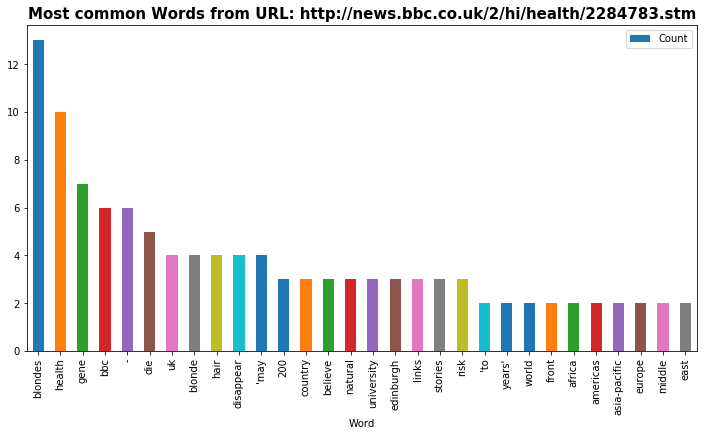

In [72]:
# Create a data frame of the most common words 
# Draw a bar chart

fig, ax1 = plt.subplots(figsize=(12,6))
ax1 = df1.plot.bar(ax=ax1, x='Word',y='Count')
plt.title(my_title , fontdict={'size':15, 'weight': 'bold'});

In [73]:
wrds = df.Word

# WORDS without spaces
wrds =  df1["Word"].str.replace(" ","")
wrds.head()

0    blondes
1     health
2       gene
3        bbc
4          -
Name: Word, dtype: object

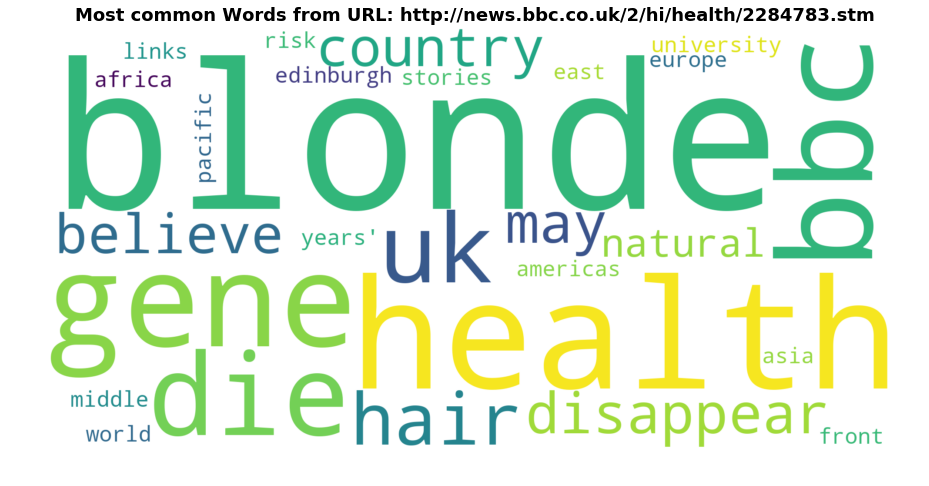

In [74]:
# Plot The WORDS in a Frame

wc = WordCloud( background_color='white', colormap=cm.viridis, scale=5).generate(" ".join(wrds))

plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation="bilinear", origin='upper')
plt.axis("off")
plt.title(my_title , fontdict={'size':18, 'weight': 'bold'});